In [843]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm

In [844]:
train=pd.read_csv(r"C:\Users\alok\Documents\ML_Deep_Learning_stuff/UNSW_NB15_training-set.csv", na_values=["-"])  # service column contains "-" so to replace it with NaN, na_values is used 
train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,NaN,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [845]:
test=pd.read_csv(r"C:\Users\alok\Documents\ML_Deep_Learning_stuff/UNSW_NB15_testing-set.csv", na_values=["-"])
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,NaN,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,NaN,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,NaN,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,NaN,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,NaN,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,NaN,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,NaN,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,NaN,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,NaN,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [846]:
train.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [847]:
test.isnull().sum()

id                       0
dur                      0
proto                    0
service              47153
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [848]:
data=pd.concat([train,test], sort=False, axis=0)
data=data.iloc[:,1:]
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,NaN,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,NaN,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,NaN,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,NaN,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


## finding missing service column values

In [849]:
def col_gen (values, column, dataframe):
    for value in values:
        dataframe[value]=np.where(dataframe[column]==value,1,0)  # will make a different column for each value

In [850]:
find = data.loc[data['service'].isnull()]
find

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
4,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
5,0.380537,tcp,NaN,FIN,10,6,534,268,39.417980,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,NaN,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,NaN,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,NaN,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,NaN,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


x_find by removing service column from find data

In [851]:
find=find.drop(columns='service')

In [852]:
find

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,FIN,6,4,258,172,74.087490,252,254,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,FIN,14,38,734,42014,78.473372,62,252,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,FIN,8,16,364,13186,14.170161,62,252,...,1,3,0,0,0,2,6,0,Normal,0
4,0.449454,tcp,FIN,10,6,534,268,33.373826,254,252,...,1,40,0,0,0,2,39,0,Normal,0
5,0.380537,tcp,FIN,10,6,534,268,39.417980,254,252,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,INT,2,0,104,0,200000.005100,254,0,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,FIN,20,8,18062,354,24.410067,254,252,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,INT,1,0,46,0,0.000000,0,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,INT,1,0,46,0,0.000000,0,0,...,1,1,0,0,0,1,1,1,Normal,0


In [853]:
known_data = data.loc[data['service'].notnull(), :]
known_data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
11,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,...,1,2,0,0,0,1,1,0,Normal,0
15,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,...,1,4,0,0,0,2,1,0,Normal,0
17,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,...,1,2,0,0,1,1,3,0,Normal,0
21,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81462,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,254,...,1,2,0,0,1,1,1,0,Normal,0
81466,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,254,...,1,1,0,0,1,1,1,0,Normal,0
81518,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,254,...,1,2,0,0,1,1,2,0,Normal,0
81540,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,254,...,1,3,0,0,1,1,3,0,Normal,0


In [854]:
x_known_data = known_data.drop(columns='service')
x_known_data

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,1.681642,tcp,FIN,12,12,628,770,13.677108,62,252,...,1,3,1,1,0,2,1,0,Normal,0
11,2.093085,tcp,FIN,62,28,56329,2212,42.520967,62,252,...,1,2,0,0,0,1,1,0,Normal,0
15,0.000002,udp,INT,2,0,138,0,500000.001300,254,0,...,1,4,0,0,0,2,1,0,Normal,0
17,0.393556,tcp,FIN,10,8,860,1096,43.195886,62,252,...,1,2,0,0,1,1,3,0,Normal,0
21,0.338017,tcp,FIN,10,6,998,268,44.376468,254,252,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81462,0.818276,tcp,FIN,60,14,68199,612,89.211954,254,252,...,1,2,0,0,1,1,1,0,Normal,0
81466,0.825170,tcp,FIN,60,14,68199,612,88.466621,254,252,...,1,1,0,0,1,1,1,0,Normal,0
81518,0.874942,tcp,FIN,60,14,68199,612,83.434101,254,252,...,1,2,0,0,1,1,2,0,Normal,0
81540,0.740231,tcp,FIN,60,14,68199,612,98.617867,254,252,...,1,3,0,0,1,1,3,0,Normal,0


In [855]:
y_known_data = known_data['service']
y_known_data

3         ftp
11       smtp
15       snmp
17       http
21       http
         ... 
81462    http
81466    http
81518    http
81540    http
82194     ftp
Name: service, Length: 116352, dtype: object

In [856]:
x_known_data.select_dtypes(include=object).columns

Index(['proto', 'state', 'attack_cat'], dtype='object')

In [857]:
states=x_known_data["state"].value_counts().index

In [858]:
col_gen(states, "state", x_known_data)
col_gen(states, "state", find)

In [859]:
x_known_data.drop(labels="state", axis=1, inplace=True)
find.drop(labels="state", axis=1, inplace=True)

In [860]:
protocols=x_known_data["proto"].value_counts().head(6).index

In [861]:
col_gen(protocols, "proto", x_known_data)
col_gen(protocols, "proto", find)

In [862]:
print(x_known_data.shape)
print(find.shape)

(116352, 50)
(141321, 50)


In [863]:
x_known_data.drop(labels="proto", axis=1, inplace=True)
find.drop(labels="proto", axis=1, inplace=True)

In [864]:
attack_categories=x_known_data["attack_cat"].value_counts().index
attack_categories

Index(['Generic', 'Normal', 'Exploits', 'DoS', 'Fuzzers', 'Reconnaissance',
       'Analysis', 'Worms', 'Backdoor'],
      dtype='object')

In [865]:
col_gen(attack_categories, "attack_cat", x_known_data)
col_gen(attack_categories, "attack_cat", find)

In [866]:
print(x_known_data.shape)
print(find.shape)

(116352, 58)
(141321, 58)


In [867]:
x_known_data.drop(labels="attack_cat", axis=1, inplace=True)
find.drop(labels="attack_cat", axis=1, inplace=True)

### finished done encoding categorical data present in x_known_data and find

In [868]:
y_known_data=y_known_data.values

In [869]:
y_known_data.shape

(116352,)

In [870]:
y_known_data=y_known_data.flatten()
y_known_data.shape

(116352,)

In [871]:
y_known_data = pd.get_dummies(data=y_known_data, columns=y_known_data)

In [872]:
print(x_known_data.shape, y_known_data.shape)

(116352, 57) (116352, 12)


In [873]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_known_data=ss.fit_transform(x_known_data)
find=ss.fit_transform(find)

In [874]:
from sklearn.model_selection import train_test_split
x_known_data_train, x_known_data_test, y_known_data_train, y_known_data_test = train_test_split(x_known_data,y_known_data,test_size=0.25)

In [875]:
print(x_known_data_train.shape, x_known_data_test.shape, y_known_data_train.shape, y_known_data_test.shape)

(87264, 57) (29088, 57) (87264, 12) (29088, 12)


In [876]:
y_known_data_train

,dhcp,dns,ftp,ftp-data,http,irc,pop3,radius,smtp,snmp,ssh,ssl
66652,0,0,0,0,1,0,0,0,0,0,0,0
78197,0,1,0,0,0,0,0,0,0,0,0,0
57723,0,1,0,0,0,0,0,0,0,0,0,0
60024,0,1,0,0,0,0,0,0,0,0,0,0
36199,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62688,0,1,0,0,0,0,0,0,0,0,0,0
50458,0,0,0,0,1,0,0,0,0,0,0,0
109220,0,0,0,0,1,0,0,0,0,0,0,0
32994,0,0,0,0,1,0,0,0,0,0,0,0


print(Y_train_of_y_train_service)
Y_train_of_y_train_service=Y_train_of_y_train_service.values
print(Y_train_of_y_train_service)

print(Y_test_of_y_train_service)
Y_test_of_y_train_service=Y_test_of_y_train_service.values
print(Y_test_of_y_train_service)

In [877]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [878]:
classifier=Sequential() 

In [879]:
classifier.add(Dense(units = 35, kernel_initializer = "he_uniform", input_dim = 57, activation = "relu"))      # 1st hidden layer

In [880]:
classifier.add(Dense(units = 35, kernel_initializer = "he_uniform",activation = "relu"))    # 2nd hidden layer

In [881]:
classifier.add(Dense(units = 35, kernel_initializer = "he_uniform", activation = "relu"))    # 3rd hidden layer

In [882]:
classifier.add(Dense(units = 25, kernel_initializer = "he_uniform", activation = "relu"))    # 4th hidden layer

In [883]:
classifier.add(Dense(units = 12, kernel_initializer = "he_uniform", activation = "softmax"))   # output layer   #activation = "softmax" if we had more than 2 classes in target

In [884]:
classifier.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])                    #loss = "categorical_crossentropy"  if more than 2 classes in target

In [948]:
classifier.fit(x_known_data_train, y_known_data_train, batch_size = 100, epochs = 5, validation_data=(x_known_data_test,y_known_data_test))       #batch size tells that after training that many examples the parameters will be updated

Train on 87264 samples, validate on 29088 samples
Epoch 1/5
87264/87264 [==============================] - 5s 53us/sample - loss: 0.0319 - accuracy: 0.9909 - val_loss: 0.0279 - val_accuracy: 0.9934
Epoch 2/5
87264/87264 [==============================] - 3s 36us/sample - loss: 0.0287 - accuracy: 0.9919 - val_loss: 0.0256 - val_accuracy: 0.9931
Epoch 3/5
87264/87264 [==============================] - 3s 39us/sample - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.0269 - val_accuracy: 0.9933
Epoch 4/5
87264/87264 [==============================] - 4s 41us/sample - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0348 - val_accuracy: 0.9920
Epoch 5/5
87264/87264 [==============================] - 4s 42us/sample - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0279 - val_accuracy: 0.9933


In [949]:
y_guessed=classifier.predict(find) # find is of type np.ndarray .. bascially this trained classifier model will predict if service column value (if passed in proper format i.e should have 57 features) has no data

In [950]:
y_guessed.shape

(141321, 12)

In [951]:
y_guessed_class=np.argmax(y_guessed, axis=1)

In [952]:
y_guessed_class.shape

(141321,)

In [953]:
find_missing_dict={0:'dhcp',1:'dns', 2:'ftp', 3:'ftp-data', 4:'http', 5:'irc', 6:'pop3', 7:'radius', 8:'smtp', 9:'snmp', 10:'ssh', 11:'ssl'}

In [954]:
y_guessed_class_label=[]
for i in range(len(y_guessed_class)):
    y_guessed_class_label.append(find_missing_dict[y_guessed_class[i]])    
    

In [955]:
len(y_guessed_class_label)

141321

In [956]:
y_guessed_class_label

['ftp',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'http',
 'dns',
 'dns',
 'dns',
 'http',
 'http',
 'http',
 'dns',
 'ftp',
 'dns',
 'ftp',
 'http',
 'http',
 'http',
 'dns',
 'smtp',
 'dns',
 'dns',
 'dns',
 'ftp',
 'http',
 'dns',
 'dns',
 'http',
 'http',
 'ftp',
 'dns',
 'http',
 'dns',
 'dns',
 'dns',
 'dns',
 'dns',
 'dns',
 'dns',
 'http',
 'dns',
 'dns',
 'dns',
 'http',
 'http',
 'dns',
 'dns',
 'dns',
 'dns',
 'dns',
 'dns',
 'http',
 'dns',
 'dns',
 'dns',
 'http',
 'http',
 'dns',
 'http',
 'dns',
 'dns',
 'ssh',
 'dns',
 'dns',
 'http',
 'http',
 'dns',
 'ftp',
 'dns',
 'http',
 'dns',
 'http',
 'http',
 'http',
 'http',
 'http',
 'dns',
 'http',
 'http',
 'dns',
 'ssh',
 'http',
 'dns',
 'http',
 'dns',
 'dns',
 'http',
 'http',
 'dns',
 'dns',
 'dns',
 'dns',
 'http',
 'ftp-data',
 'dns',
 'http',
 'dns',
 'http',
 'dns',
 'dns',
 'h

# finish finding missing service column values

**converting y_guessed_class_label (list) into ndarray**

In [894]:
# y_guessed_class_label=np.array(y_guessed_class_label)

**converting y_guessed_class_label (ndarray) into pandas dataframe**

In [895]:
y_guessed_class_label=pd.DataFrame(y_guessed_class_label)

In [896]:
y_guessed_class_label

,0
0,ftp
1,http
2,http
3,dns
4,http
...,...
141316,dns
141317,http
141318,dns
141319,dns


## finally replacing NaN with generated service column data

In [897]:
data.reset_index(inplace=True)

In [898]:
data = data.iloc[:, 1:]
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,udp,NaN,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
257669,1.106101,tcp,NaN,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
257670,0.000000,arp,NaN,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
257671,0.000000,arp,NaN,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [899]:
data.isnull().sum()

dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm          0
ct_dst_src_ltm      

In [900]:
test = data.loc[data['service'].isnull(), :].drop(columns='service')
test = test.reset_index()
test = test.iloc[:, 1:]
test

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,FIN,6,4,258,172,74.087490,252,254,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,FIN,14,38,734,42014,78.473372,62,252,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,FIN,8,16,364,13186,14.170161,62,252,...,1,3,0,0,0,2,6,0,Normal,0
3,0.449454,tcp,FIN,10,6,534,268,33.373826,254,252,...,1,40,0,0,0,2,39,0,Normal,0
4,0.380537,tcp,FIN,10,6,534,268,39.417980,254,252,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141316,0.000005,udp,INT,2,0,104,0,200000.005100,254,0,...,1,2,0,0,0,2,1,0,Normal,0
141317,1.106101,tcp,FIN,20,8,18062,354,24.410067,254,252,...,1,1,0,0,0,3,2,0,Normal,0
141318,0.000000,arp,INT,1,0,46,0,0.000000,0,0,...,1,1,0,0,0,1,1,1,Normal,0
141319,0.000000,arp,INT,1,0,46,0,0.000000,0,0,...,1,1,0,0,0,1,1,1,Normal,0


In [901]:
print(test.shape, y_guessed_class_label.shape)

(141321, 43) (141321, 1)


In [902]:
test = pd.concat([test, y_guessed_class_label], axis=1, ignore_index=True)

In [903]:
test = test.reset_index()
test

,index,0,1,2,3,4,5,6,7,8,...,34,35,36,37,38,39,40,41,42,43
0,0,0.121478,tcp,FIN,6,4,258,172,74.087490,252,...,1,0,0,0,1,1,0,Normal,0,ftp
1,1,0.649902,tcp,FIN,14,38,734,42014,78.473372,62,...,2,0,0,0,1,6,0,Normal,0,http
2,2,1.623129,tcp,FIN,8,16,364,13186,14.170161,62,...,3,0,0,0,2,6,0,Normal,0,http
3,3,0.449454,tcp,FIN,10,6,534,268,33.373826,254,...,40,0,0,0,2,39,0,Normal,0,dns
4,4,0.380537,tcp,FIN,10,6,534,268,39.417980,254,...,40,0,0,0,2,39,0,Normal,0,http
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141316,141316,0.000005,udp,INT,2,0,104,0,200000.005100,254,...,2,0,0,0,2,1,0,Normal,0,dns
141317,141317,1.106101,tcp,FIN,20,8,18062,354,24.410067,254,...,1,0,0,0,3,2,0,Normal,0,http
141318,141318,0.000000,arp,INT,1,0,46,0,0.000000,0,...,1,0,0,0,1,1,1,Normal,0,dns
141319,141319,0.000000,arp,INT,1,0,46,0,0.000000,0,...,1,0,0,0,1,1,1,Normal,0,dns


In [904]:
test = test.iloc[:, 1:]
test

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.121478,tcp,FIN,6,4,258,172,74.087490,252,254,...,1,0,0,0,1,1,0,Normal,0,ftp
1,0.649902,tcp,FIN,14,38,734,42014,78.473372,62,252,...,2,0,0,0,1,6,0,Normal,0,http
2,1.623129,tcp,FIN,8,16,364,13186,14.170161,62,252,...,3,0,0,0,2,6,0,Normal,0,http
3,0.449454,tcp,FIN,10,6,534,268,33.373826,254,252,...,40,0,0,0,2,39,0,Normal,0,dns
4,0.380537,tcp,FIN,10,6,534,268,39.417980,254,252,...,40,0,0,0,2,39,0,Normal,0,http
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141316,0.000005,udp,INT,2,0,104,0,200000.005100,254,0,...,2,0,0,0,2,1,0,Normal,0,dns
141317,1.106101,tcp,FIN,20,8,18062,354,24.410067,254,252,...,1,0,0,0,3,2,0,Normal,0,http
141318,0.000000,arp,INT,1,0,46,0,0.000000,0,0,...,1,0,0,0,1,1,1,Normal,0,dns
141319,0.000000,arp,INT,1,0,46,0,0.000000,0,0,...,1,0,0,0,1,1,1,Normal,0,dns


**assigning names to columns**

In [905]:
cols_Test=['dur', 'proto', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label','service']

In [906]:
test.columns=cols_Test
test

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,service
0,0.121478,tcp,FIN,6,4,258,172,74.087490,252,254,...,1,0,0,0,1,1,0,Normal,0,ftp
1,0.649902,tcp,FIN,14,38,734,42014,78.473372,62,252,...,2,0,0,0,1,6,0,Normal,0,http
2,1.623129,tcp,FIN,8,16,364,13186,14.170161,62,252,...,3,0,0,0,2,6,0,Normal,0,http
3,0.449454,tcp,FIN,10,6,534,268,33.373826,254,252,...,40,0,0,0,2,39,0,Normal,0,dns
4,0.380537,tcp,FIN,10,6,534,268,39.417980,254,252,...,40,0,0,0,2,39,0,Normal,0,http
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141316,0.000005,udp,INT,2,0,104,0,200000.005100,254,0,...,2,0,0,0,2,1,0,Normal,0,dns
141317,1.106101,tcp,FIN,20,8,18062,354,24.410067,254,252,...,1,0,0,0,3,2,0,Normal,0,http
141318,0.000000,arp,INT,1,0,46,0,0.000000,0,0,...,1,0,0,0,1,1,1,Normal,0,dns
141319,0.000000,arp,INT,1,0,46,0,0.000000,0,0,...,1,0,0,0,1,1,1,Normal,0,dns


## reordering columns i.e moving service at 3rd column from last

In [907]:
test=test[['dur', 'proto','service','state', 'spkts', 'dpkts', 'sbytes',          
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']]

In [908]:
test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,ftp,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,http,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,http,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,0.449454,tcp,dns,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
4,0.380537,tcp,http,FIN,10,6,534,268,39.417980,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141316,0.000005,udp,dns,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
141317,1.106101,tcp,http,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
141318,0.000000,arp,dns,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
141319,0.000000,arp,dns,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [909]:
train=data.loc[data['service'].notnull(), :]

In [910]:
train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
11,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,...,1,2,0,0,0,1,1,0,Normal,0
15,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,...,1,4,0,0,0,2,1,0,Normal,0
17,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,...,1,2,0,0,1,1,3,0,Normal,0
21,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256803,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,254,...,1,2,0,0,1,1,1,0,Normal,0
256807,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,254,...,1,1,0,0,1,1,1,0,Normal,0
256859,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,254,...,1,2,0,0,1,1,2,0,Normal,0
256881,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,254,...,1,3,0,0,1,1,3,0,Normal,0


In [911]:
train=train.reset_index()
train

,index,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
1,11,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
2,15,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
3,17,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
4,21,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116347,256803,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,...,1,2,0,0,1,1,1,0,Normal,0
116348,256807,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,...,1,1,0,0,1,1,1,0,Normal,0
116349,256859,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,...,1,2,0,0,1,1,2,0,Normal,0
116350,256881,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,...,1,3,0,0,1,1,3,0,Normal,0


##### on resetting column, extra column named index is added so we have to remove it

In [912]:
train = train.iloc[:, 1:]
train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
1,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,...,1,2,0,0,0,1,1,0,Normal,0
2,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,...,1,4,0,0,0,2,1,0,Normal,0
3,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,...,1,2,0,0,1,1,3,0,Normal,0
4,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116347,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,254,...,1,2,0,0,1,1,1,0,Normal,0
116348,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,254,...,1,1,0,0,1,1,1,0,Normal,0
116349,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,254,...,1,2,0,0,1,1,2,0,Normal,0
116350,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,254,...,1,3,0,0,1,1,3,0,Normal,0


In [913]:
states=test["state"].value_counts()
states

FIN    69814
INT    58544
CON     9275
REQ     3599
RST       70
ECO       12
ACC        3
URN        1
no         1
PAR        1
CLO        1
Name: state, dtype: int64

In [914]:
states=train["state"].value_counts()
states

INT    57894
FIN    47350
CON    10859
REQ      234
RST       14
ACC        1
Name: state, dtype: int64

### since we dont have enough variations of Train data (as we can see that train data doesn't even have all types of state values so training won't be good so we are dropping this train test approach rather what we gonna do is mix train and test and then using traintest split we will get new train and test data)

## merging test and train data with having no NaN values

In [915]:
data = pd.concat([train, test], axis=0, ignore_index=True)   # 0 means along rows
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
1,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,...,1,2,0,0,0,1,1,0,Normal,0
2,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,...,1,4,0,0,0,2,1,0,Normal,0
3,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,...,1,2,0,0,1,1,3,0,Normal,0
4,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,udp,dns,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
257669,1.106101,tcp,http,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
257670,0.000000,arp,dns,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
257671,0.000000,arp,dns,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


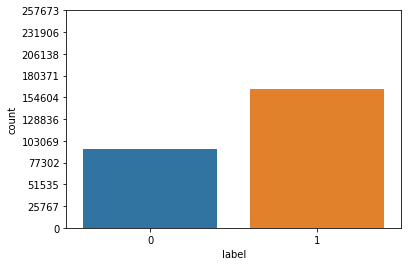

In [916]:
ax=sns.countplot(x="label", data=data)
ax.yaxis.set_ticks(np.linspace(0, len(data), 11)) # put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
plt.show()

In [917]:
cat_feature = data.select_dtypes(include=['category', object]).columns
cat_feature

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

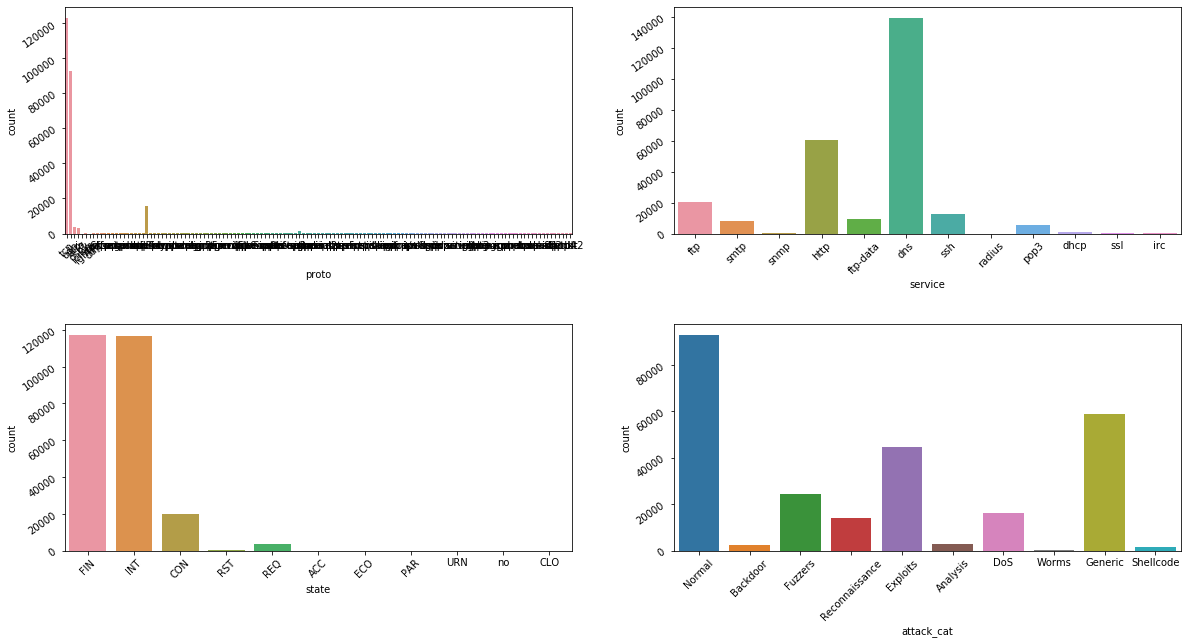

In [918]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.4)
for col, subplot in zip(cat_feature, ax.flatten()):
    sns.countplot(data[col], ax=subplot)
    for labelx, labely in zip(subplot.get_xticklabels(), subplot.get_yticklabels()):
            labelx.set_rotation(45)
            labely.set_rotation(35) 
plt.show()


# for col in cat_feature:
#     sns.countplot(train[col],data=train)
#     plt.show()

# 3.2 visualizing numerical data and its distribution


In [919]:
num_features = data.drop(['label'], axis=1).select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
print(num_features)
print(num_features.size)

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')
39


KeyboardInterrupt: 

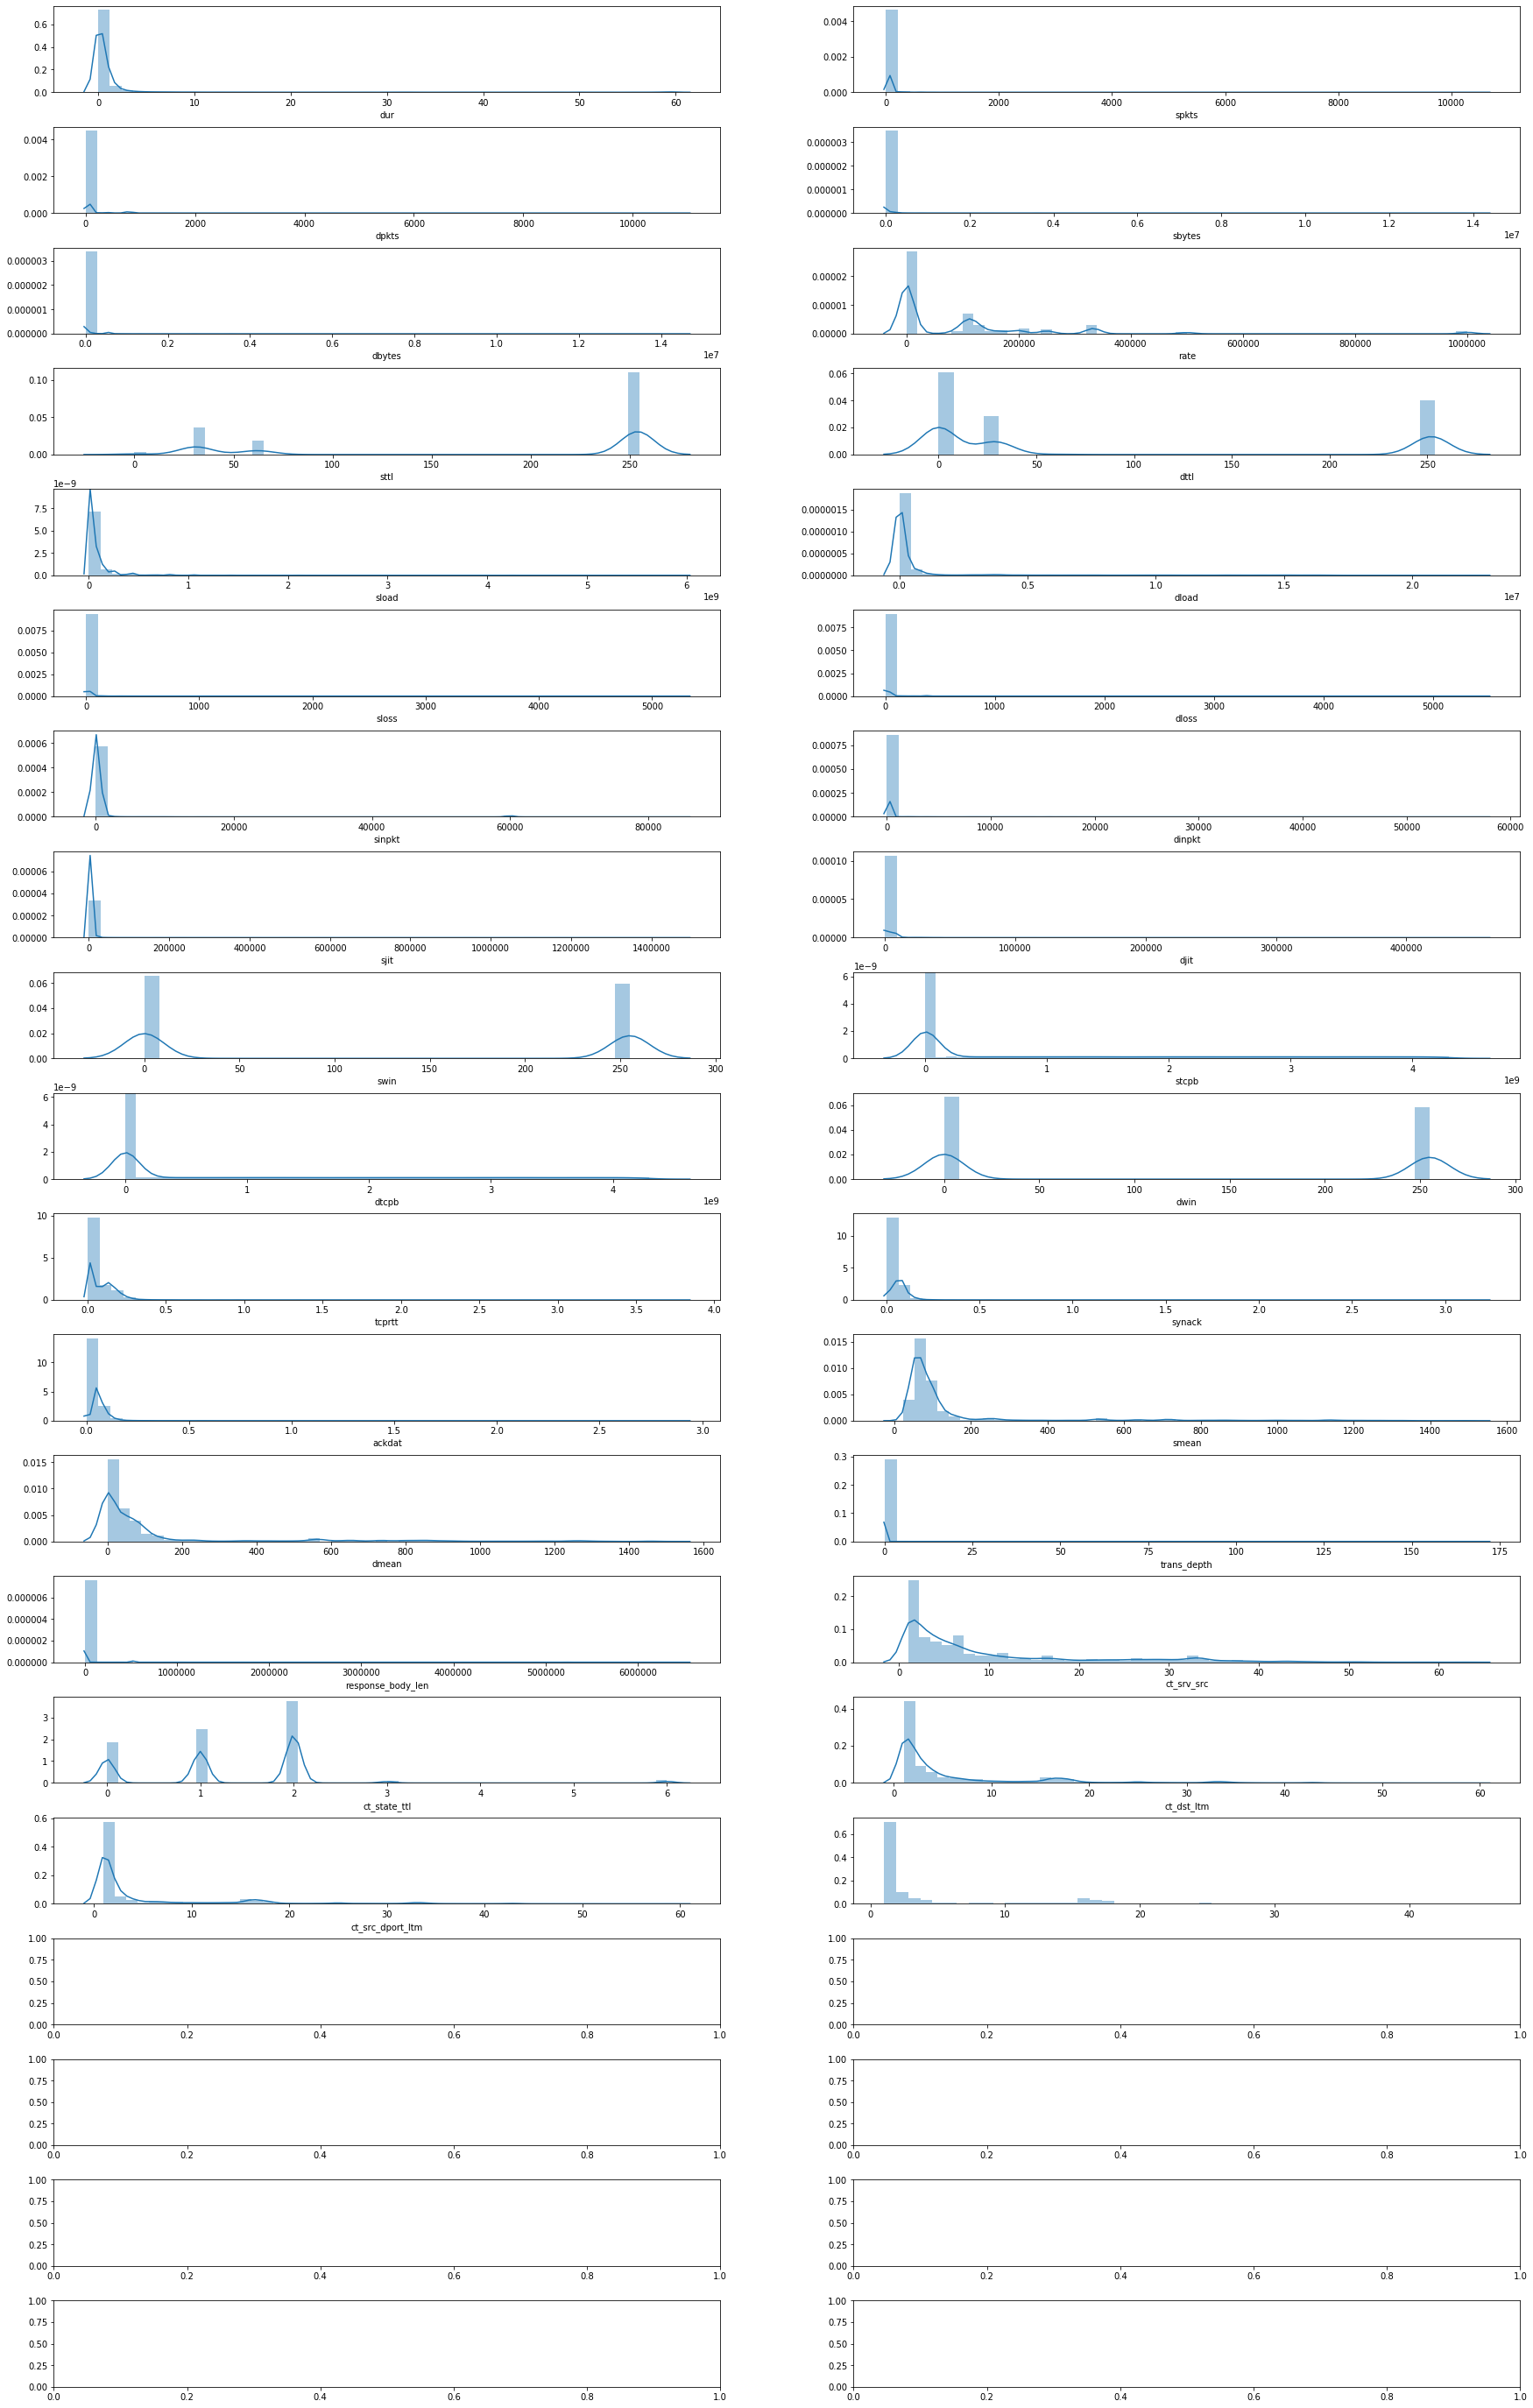

In [920]:
fig, ax = plt.subplots(20, 2, figsize=(30, 50))
plt.subplots_adjust(hspace = 0.4)
for col, splot in zip(num_features, ax.flatten()):
    sns.distplot(data[col], ax=splot)
plt.savefig('num_f.png')
plt.show()

## 3.3 Correlation of data .. discards object (categorical) data .. only accepts integer or float

In [ ]:
data_corr = data.corr()  
print(type(data_corr))
data_corr.dtypes

In [ ]:
data_corr = data.corr()

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(data_corr, annot=True)
plt.savefig('data_corr.png')
plt.show()

# from here

In [ ]:
high_corr_var=np.where(data_corr>0.95)

In [ ]:
high_corr_var

In [ ]:
temp = []
for x, y in zip(*high_corr_var):
    if x!=y and x<y:
        print(data_corr.columns[x], data_corr.columns[y])
        temp.append((data_corr.columns[x],data_corr.columns[y]))
high_corr_var=temp

In [ ]:
high_corr_var

# # till here .. whats use

## sbytes , sloss , spkts 

In [ ]:
print(data[['sbytes','sloss','spkts']].corr())        # ??????????????  why these 3 


In [ ]:
sns.heatmap(data[['sbytes','sloss','spkts']].corr(), annot=True)
plt.show()


- so we can drop column sbyte from above representation.
- From this visualization we can see that both have high correlation and same distribution with other columns

## dbytes     dloss     dpkts

In [ ]:
print(train[['dbytes','dloss','dpkts']].corr())

# initial project values  
# dbytes  1.000000  0.996504  0.971907
# dloss   0.996504  1.000000  0.978636
# dpkts   0.971907  0.978636  1.000000

In [ ]:
sns.heatmap(train[['dbytes','dloss','dpkts']].corr(), annot=True)
plt.show()

- so we can drop column dbytes from above representation.
- From this visualization we can see that both have high correlation and same distribution with other columns

## ct_dst_src_ltm  ct_srv_src  ct_srv_dst

In [921]:
print(train[['ct_dst_src_ltm','ct_srv_src','ct_srv_dst']].corr())

                ct_dst_src_ltm  ct_srv_src  ct_srv_dst
ct_dst_src_ltm        1.000000    0.983991    0.984887
ct_srv_src            0.983991    1.000000    0.996077
ct_srv_dst            0.984887    0.996077    1.000000


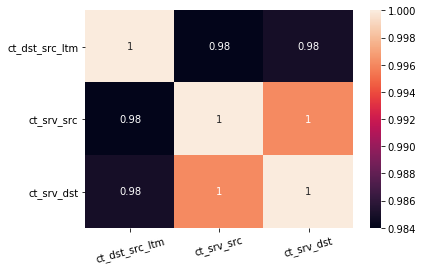

In [922]:
obj=sns.heatmap(train[['ct_dst_src_ltm','ct_srv_src','ct_srv_dst']].corr(), annot=True)
for labelx, labely in zip(obj.get_xticklabels(), obj.get_yticklabels()):
    labelx.set_rotation(15)
    labely.set_rotation(0)
plt.show()

- we can drop column ct_srv_dst
- From this visualization we can see that three columns are having high correlation and same distribution

## swin     dwin

In [923]:
print(train[['swin','dwin']].corr())

          swin      dwin
swin  1.000000  0.999982
dwin  0.999982  1.000000


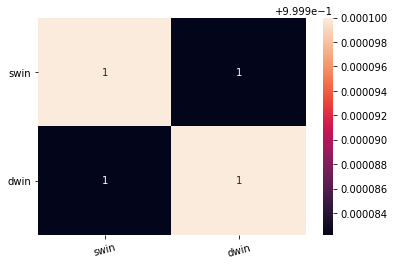

In [924]:
obj=sns.heatmap(train[['swin', 'dwin']].corr(), annot=True)
for labelx, labely in zip(obj.get_xticklabels(), obj.get_yticklabels()):
    labelx.set_rotation(15)
    labely.set_rotation(0)
plt.show()

## is_ftp_login  ct_ftp_cmd

In [925]:
print(train[['is_ftp_login','ct_ftp_cmd']].corr())

              is_ftp_login  ct_ftp_cmd
is_ftp_login      1.000000    0.998838
ct_ftp_cmd        0.998838    1.000000


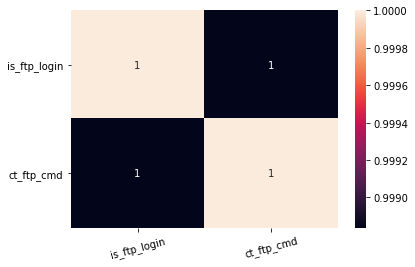

In [926]:
obj=sns.heatmap(train[['is_ftp_login', 'ct_ftp_cmd']].corr(), annot=True)
for labelx, labely in zip(obj.get_xticklabels(), obj.get_yticklabels()):
    labelx.set_rotation(15)
    labely.set_rotation(0)
plt.show()

- we can drop ct_ftp_cmd. 
- From this visualization we can see that both have high correlation and same distribution

# 3.5 EDA conclusion

#### we can drop the 5 columns mentioned from above analysis which are highly correlated
- sbyte and dbytes
- ct_srv_dst
- ct_ftp_cmd
- dwin

In [927]:
data.drop(['sbytes', 'dbytes','ct_srv_dst', 'ct_ftp_cmd', 'dwin'], axis=1, inplace=True)

In [928]:
data.shape

(257673, 39)

In [929]:
states=data["state"].value_counts().index
states

Index(['FIN', 'INT', 'CON', 'REQ', 'RST', 'ECO', 'ACC', 'URN', 'no', 'PAR',
       'CLO'],
      dtype='object')

In [930]:
col_gen(states, "state", data)

In [931]:
print(data.shape)


(257673, 50)


In [932]:
data.drop(labels="state", axis=1, inplace=True)


In [933]:
(data["proto"].value_counts())

tcp     123041
udp      92701
unas     15599
arp       3846
ospf      3271
         ...  
rdp        131
egp        131
igmp        48
icmp        15
rtp          1
Name: proto, Length: 133, dtype: int64

In [934]:
protos=data["proto"].value_counts().head(6).index
protos

Index(['tcp', 'udp', 'unas', 'arp', 'ospf', 'sctp'], dtype='object')

In [935]:
col_gen(protos, "proto", data)

In [936]:
data.drop(labels="proto", axis=1, inplace=True)

In [937]:
(data["service"].value_counts())

dns         139467
http         60658
ftp          20219
ssh          12823
ftp-data      9222
smtp          8223
pop3          5595
dhcp          1132
snmp           197
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In [938]:
services=data["service"].value_counts().head(8).index
services

Index(['dns', 'http', 'ftp', 'ssh', 'ftp-data', 'smtp', 'pop3', 'dhcp'], dtype='object')

In [939]:
col_gen(services, "service", data)

In [940]:
data.drop(labels="service", axis=1, inplace=True)

In [946]:
print(data.shape)

(257673, 66)


In [947]:
data.select_dtypes(include=object)

""
0
1
2
3
4
...
257668
257669
257670
257671


In [787]:
X = data.drop(columns='attack_cat')

In [788]:
print(X.shape)
X

(257673, 60)


,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sloss,dloss,...,ospf,sctp,dns,http,ftp-data,ftp,smtp,pop3,ssh,dhcp
0,1.681642,12,12,13.677108,62,252,2.740179e+03,3358.622070,1,3,...,0,0,0,0,0,1,0,0,0,0
1,2.093085,62,28,42.520967,62,252,2.118251e+05,8152.559082,28,8,...,0,0,0,0,0,0,1,0,0,0
2,0.000002,2,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.393556,10,8,43.195886,62,252,1.573347e+04,19494.048830,2,2,...,0,0,0,1,0,0,0,0,0,0
4,0.338017,10,6,44.376468,254,252,2.127704e+04,5301.508789,2,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,0
257669,1.106101,20,8,24.410067,254,252,1.241044e+05,2242.109863,7,1,...,0,0,0,1,0,0,0,0,0,0
257670,0.000000,1,0,0.000000,0,0,0.000000e+00,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,0
257671,0.000000,1,0,0.000000,0,0,0.000000e+00,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,0


In [789]:
Y=data['attack_cat']

In [790]:
print(type(Y))
print(Y.shape)
print(Y.isnull().sum())
print(Y.value_counts())

<class 'pandas.core.series.Series'>
(257673,)
0
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64


### one hot encoding target label using OneHotEncoder..doesn't make sense if we have only 2 class in target label..but here we have 10 classes

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='error')
Y=ohe.fit_transform(Y)
Y=Y.toarray()

### using get_dummies

In [791]:
Y=pd.get_dummies(data=Y, columns=Y)

### one hot encoding target label using keras Library..doesn't make sense if we have only 2 class in target label..but here we have 10 classes

Y=Y.values
Y=Y.reshape(-1,1)
Y.shape

from keras.utils import np_utils

Y= np_utils.to_categorical(Y)      # why r we doing this ...and to do this we can also use OneHotEncoder from sklearn.preprocessing


In [792]:
print(Y.shape)
Y

(257673, 10)


,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
257668,0,0,0,0,0,0,1,0,0,0
257669,0,0,0,0,0,0,1,0,0,0
257670,0,0,0,0,0,0,1,0,0,0
257671,0,0,0,0,0,0,1,0,0,0


In [793]:
X

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sloss,dloss,...,ospf,sctp,dns,http,ftp-data,ftp,smtp,pop3,ssh,dhcp
0,1.681642,12,12,13.677108,62,252,2.740179e+03,3358.622070,1,3,...,0,0,0,0,0,1,0,0,0,0
1,2.093085,62,28,42.520967,62,252,2.118251e+05,8152.559082,28,8,...,0,0,0,0,0,0,1,0,0,0
2,0.000002,2,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.393556,10,8,43.195886,62,252,1.573347e+04,19494.048830,2,2,...,0,0,0,1,0,0,0,0,0,0
4,0.338017,10,6,44.376468,254,252,2.127704e+04,5301.508789,2,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,0
257669,1.106101,20,8,24.410067,254,252,1.241044e+05,2242.109863,7,1,...,0,0,0,1,0,0,0,0,0,0
257670,0.000000,1,0,0.000000,0,0,0.000000e+00,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,0
257671,0.000000,1,0,0.000000,0,0,0.000000e+00,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,0


In [794]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
print(X.type)
X

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [795]:
# from sklearn.decomposition import PCA

In [796]:
# pca=PCA(n_components=50)

In [797]:
# pca.fit(X)

In [798]:
# X=pca.transform(X)

In [799]:
Y

,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
257668,0,0,0,0,0,0,1,0,0,0
257669,0,0,0,0,0,0,1,0,0,0
257670,0,0,0,0,0,0,1,0,0,0
257671,0,0,0,0,0,0,1,0,0,0


In [800]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)  # train_test_split is so versatile .. handling numpy ndarray and pandas dataFrame at same time

In [801]:
print(X_train.shape, X_test.shape)

(193254, 60) (64419, 60)


In [802]:
Y_train = Y_train.values
Y_test = Y_test.values

In [803]:
print(Y_train.shape, Y_test.shape)

(193254, 10) (64419, 10)


Y_train=pd.DataFrame(Y_train, columns=cols)
Y_train

In [826]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [827]:
classifier=Sequential() 

we don't set conditions for input layer

In [828]:
classifier.add(Dense(units = 30, kernel_initializer = "he_uniform", input_dim = 60, activation = "relu"))      # 1st hidden layer

In [829]:
classifier.add(BatchNormalization(axis=1))

In [830]:
classifier.add(Dense(units = 35, kernel_initializer = "he_uniform",activation = "relu"))    # 2nd hidden layer

In [831]:
classifier.add(Dropout(0.2))

classifier.add(BatchNormalization(axis=1))

In [832]:
classifier.add(Dense(units = 35, kernel_initializer = "he_uniform", activation = "relu"))    # 3rd hidden layer

classifier.add(BatchNormalization(axis=1))

In [833]:
# classifier.add(Dense(units = 25, kernel_initializer = "he_uniform", activation = "relu"))    # 4th hidden layer

In [834]:
# classifier.add(BatchNormalization(axis=1))

In [835]:
classifier.add(Dense(units = 10, kernel_initializer = "he_uniform", activation = "softmax"))   # output layer   #activation = "softmax" if we had more than 2 classes in target

In [836]:
classifier.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])                    #loss = "categorical_crossentropy"  if more than 2 classes in target

In [837]:
classifier.fit(X_train, Y_train, batch_size = 100, epochs = 15, validation_data=(X_test, Y_test))       #batch size tells that after training that many examples the parameters will be updated

Train on 193254 samples, validate on 64419 samples
Epoch 1/15
193254/193254 [==============================] - 11s 56us/sample - loss: 0.5405 - accuracy: 0.8131 - val_loss: 0.4155 - val_accuracy: 0.8525
Epoch 2/15
193254/193254 [==============================] - 10s 51us/sample - loss: 0.4130 - accuracy: 0.8512 - val_loss: 0.4031 - val_accuracy: 0.8590
Epoch 3/15
193254/193254 [==============================] - 11s 56us/sample - loss: 0.3930 - accuracy: 0.8565 - val_loss: 0.4326 - val_accuracy: 0.8540
Epoch 4/15
193254/193254 [==============================] - 9s 45us/sample - loss: 0.3822 - accuracy: 0.8596 - val_loss: 0.4189 - val_accuracy: 0.8562
Epoch 5/15
193254/193254 [==============================] - 11s 55us/sample - loss: 0.3743 - accuracy: 0.8619 - val_loss: 0.3928 - val_accuracy: 0.8646
Epoch 6/15
193254/193254 [==============================] - 10s 49us/sample - loss: 0.3677 - accuracy: 0.8632 - val_loss: 0.3963 - val_accuracy: 0.8662
Epoch 7/15
193254/193254 [============

In [842]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)

ValueError: bad input shape (193254, 10)

In [1]:
predicted_class={0:'Analysis', 1:'Backdoor', 2:'DoS', 3:'Exploits', 4:'Fuzzers', 5:'Generic',6:'Normal', 7:'Reconnaissance',8:'Shellcode', 9:'Worms'}

In [838]:
y_pred=classifier.predict(X_test)
print(y_pred[0])
Y_test_class=np.argmax(Y_test, axis=1)
y_pred_class=np.argmax(y_pred, axis=1)
print(Y_test_class[0])
print(predicted_label[y_pred_class[0]])

[1.3790426e-35 0.0000000e+00 1.0159053e-25 3.3280547e-24 1.6339412e-27
 3.0328095e-30 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
6
6


In [4]:
print(predicted_class[3])

Exploits


In [839]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_class, y_pred_class)
cm

array([[   53,    13,     0,   594,    20,     0,     0,     0,     0,
            0],
       [    0,   293,     0,   240,    15,     0,     0,     1,     0,
            0],
       [    2,     9,    29,  3879,    73,     0,     0,    40,    61,
            0],
       [   17,    13,     8, 10400,   365,     2,     0,   298,    14,
            0],
       [    4,    32,     1,  1120,  4024,   206,     0,   400,   231,
            0],
       [    1,     9,     1,   346,    34, 14378,     0,    16,    19,
            0],
       [    0,     0,     0,     0,     0,     0, 23227,     0,     0,
            0],
       [    1,     0,     5,   797,    15,     0,     1,  2682,     8,
            0],
       [    0,     0,     1,    19,    26,     0,     0,   156,   181,
            0],
       [    0,     0,     0,    36,     0,     2,     0,     1,     0,
            0]], dtype=int64)

In [840]:
from sklearn.metrics import accuracy_score
accs=accuracy_score(Y_test_class, y_pred_class)
accs

0.8579301137863052